Dataset Shape: (1118669, 34)


,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,...,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
0,TXN_2015_00000001,2015-01-25,CUST_2015_00003884,PROD_000021,Samsung Galaxy S6 16GB Black,Electronics,Smartphones,Samsung,123614.29,27.91,...,True,Republic Day Sale,5.0,Delivered,1,2015,1,0.19,True,4.7
1,TXN_2015_00000002,2015-05-01,CUST_2015_00011709,PROD_000055,OnePlus OnePlus 2 16GB White,Electronics,Smartphones,OnePlus,54731.86,0.00,...,False,NaN,4.5,Delivered,1,2015,1,0.20,True,4.1
2,TXN_2015_00000003,2015-01-24,CUST_2015_00004782,PROD_000039,Samsung Galaxy Note 5 64GB Black,Electronics,Smartphones,Samsung,97644.25,46.93,...,True,Republic Day Sale,NaN,Delivered,1,2015,1,0.17,True,3.3
3,TXN_2015_00000004,2015-01-28,CUST_2015_00008105,PROD_000085,Motorola Moto G (3rd Gen) 16GB Black,Electronics,Smartphones,Motorola,21947.26,0.00,...,False,NaN,3.0,Delivered,1,2015,1,0.22,True,3.5
4,TXN_2015_00000005,2015-01-31,CUST_2015_00002955,PROD_000055,OnePlus OnePlus 2 16GB White,Electronics,Smartphones,OnePlus,54731.86,0.00,...,False,NaN,4.0,Delivered,1,2015,1,0.20,True,4.1



Missing Values:


customer_city       0
customer_state      0
customer_tier       0
final_amount_inr    0
order_year          0
dtype: int64

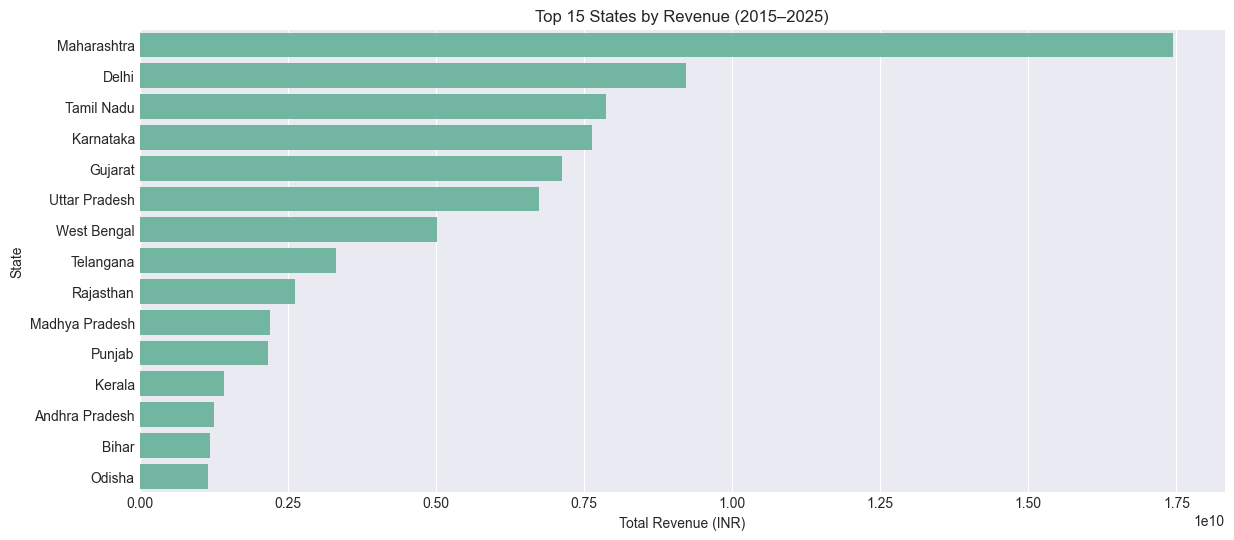

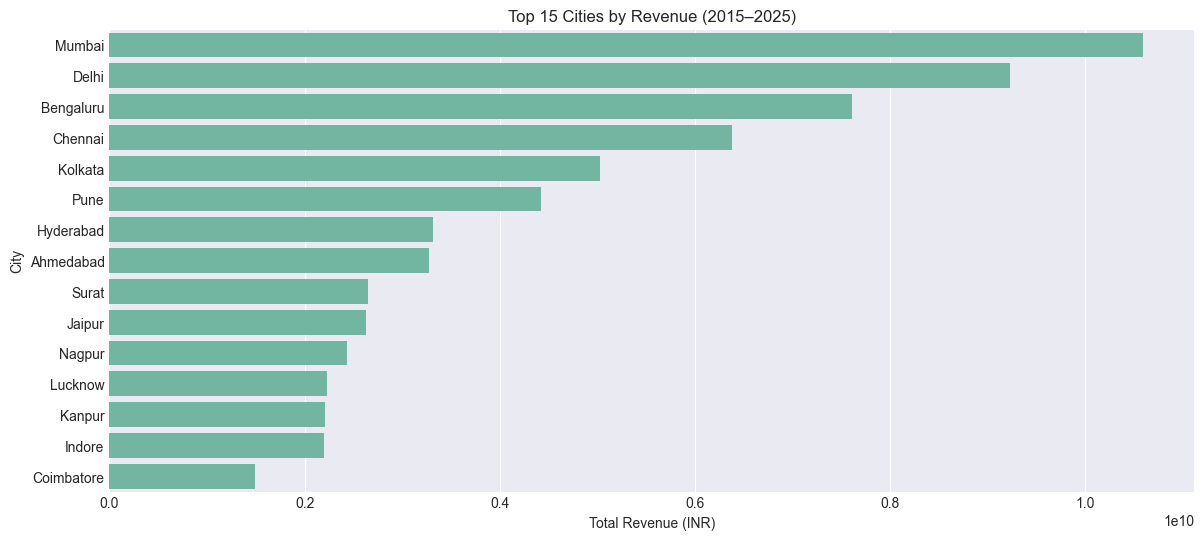

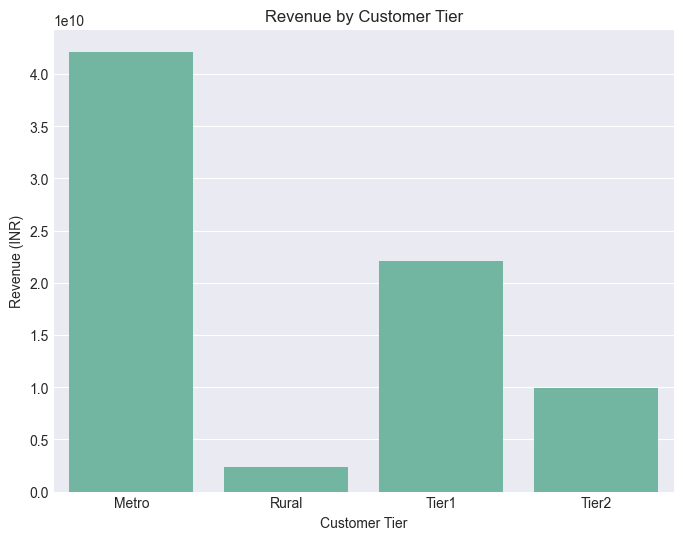

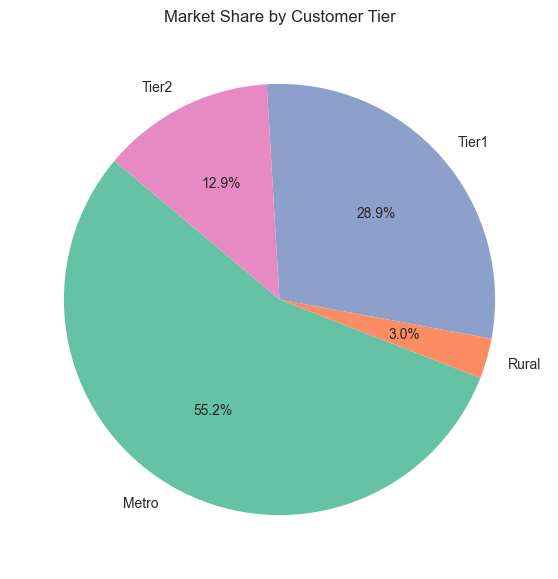

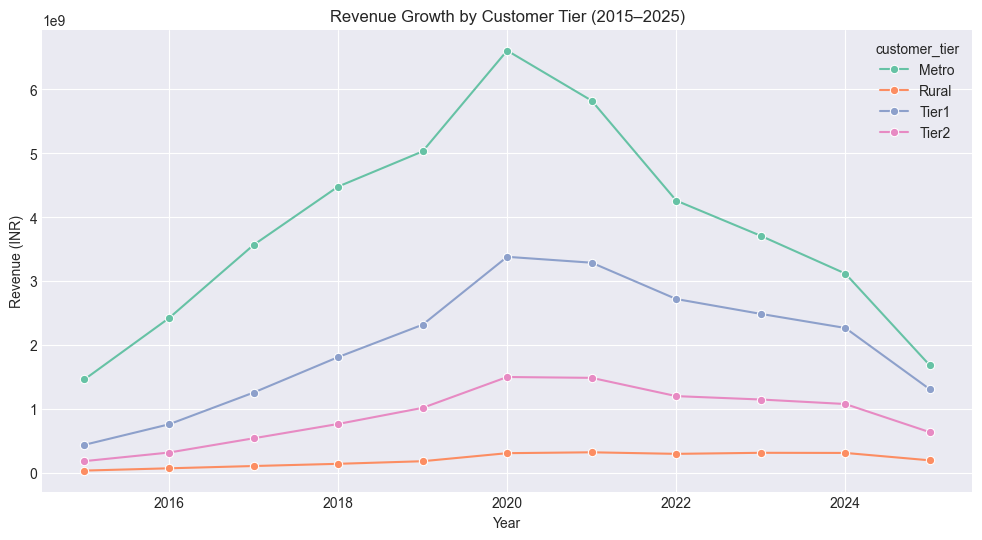

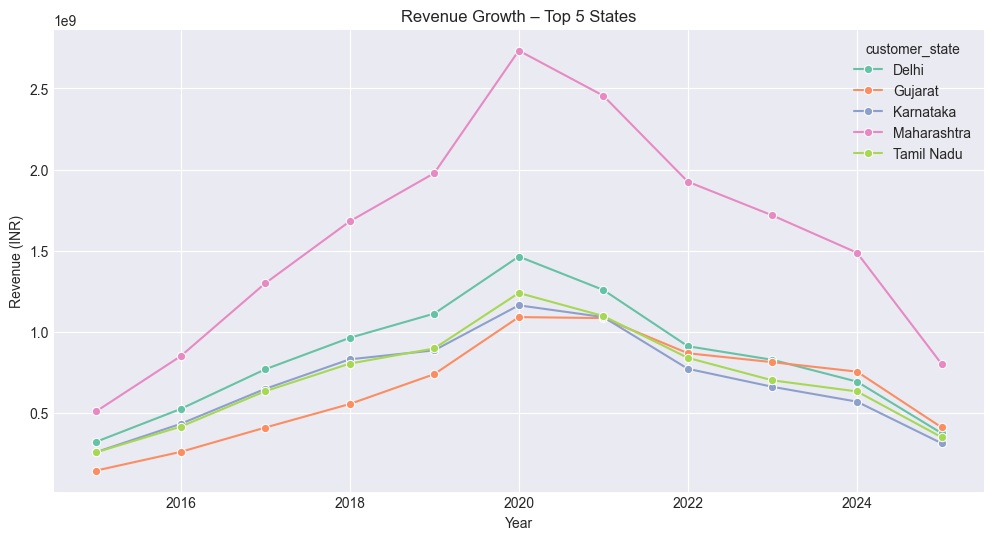


State Revenue Density (Top 10):


,customer_state,total_revenue,total_orders,avg_order_value
7,Maharashtra,1.744146e+10,244626,71298.471746
2,Delhi,9.223845e+09,122523,75282.558129
11,Tamil Nadu,7.873028e+09,110544,71220.764637
4,Karnataka,7.630486e+09,101707,75024.194562
3,Gujarat,7.135304e+09,111383,64060.980278
13,Uttar Pradesh,6.745835e+09,117457,57432.376934
14,West Bengal,5.022398e+09,66357,75687.539378
12,Telangana,3.312434e+09,44195,74950.423578
10,Rajasthan,2.626459e+09,40119,65466.708820
6,Madhya Pradesh,2.200244e+09,33318,66037.710656


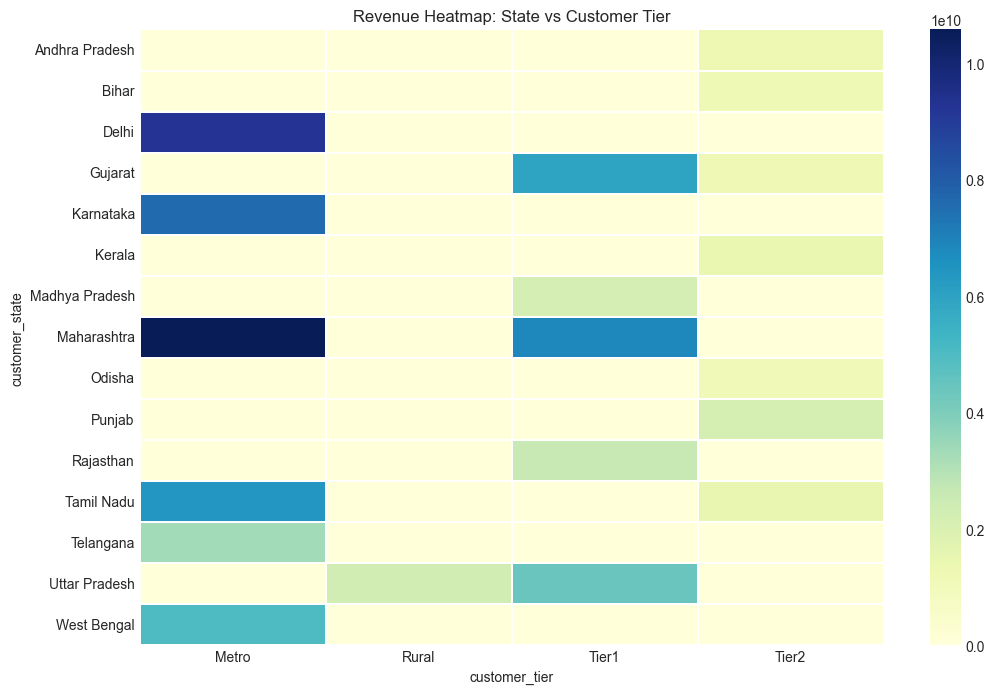


KEY INSIGHTS:
- Metro & Tier-1 cities dominate revenue volume
- Tier-2 cities show strong post-2020 growth
- Maharashtra, Karnataka, Delhi, Tamil Nadu lead consistently
- Tier-2 & Rural regions show higher growth momentum
- High AOV in metros, volume-driven growth in non-metro regions



In [1]:
# =========================================================
# EDA 06 – Geographic Sales Performance Analysis (India)
# Questions Covered:
# - Revenue by State & City
# - Tier-wise performance (Metro / Tier-1 / Tier-2 / Rural)
# - Growth trends across geographies (2015–2025)
# - Revenue density & choropleth-ready aggregations
# =========================================================

# ===============================
# IMPORT LIBRARIES
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("Set2")

# ===============================
# LOAD MASTER DATASET
# ===============================
df = pd.read_csv("../master/amazon_india_master_2015_2025.csv")

print("Dataset Shape:", df.shape)
display(df.head())

# ===============================
# BASIC DATA CHECK
# ===============================
geo_cols = [
    "customer_city",
    "customer_state",
    "customer_tier",
    "final_amount_inr",
    "order_year"
]

print("\nMissing Values:")
display(df[geo_cols].isna().sum())

# ===============================
# REVENUE BY STATE (OVERALL)
# ===============================
state_revenue = (
    df.groupby("customer_state")["final_amount_inr"]
      .sum()
      .sort_values(ascending=False)
      .reset_index()
)

plt.figure(figsize=(14,6))
sns.barplot(
    data=state_revenue.head(15),
    x="final_amount_inr",
    y="customer_state"
)
plt.title("Top 15 States by Revenue (2015–2025)")
plt.xlabel("Total Revenue (INR)")
plt.ylabel("State")
plt.show()

# ===============================
# REVENUE BY CITY (TOP CITIES)
# ===============================
city_revenue = (
    df.groupby("customer_city")["final_amount_inr"]
      .sum()
      .sort_values(ascending=False)
      .reset_index()
)

plt.figure(figsize=(14,6))
sns.barplot(
    data=city_revenue.head(15),
    x="final_amount_inr",
    y="customer_city"
)
plt.title("Top 15 Cities by Revenue (2015–2025)")
plt.xlabel("Total Revenue (INR)")
plt.ylabel("City")
plt.show()

# ===============================
# TIER-WISE REVENUE CONTRIBUTION
# ===============================
tier_revenue = (
    df.groupby("customer_tier")["final_amount_inr"]
      .sum()
      .reset_index()
)

plt.figure(figsize=(8,6))
sns.barplot(
    data=tier_revenue,
    x="customer_tier",
    y="final_amount_inr"
)
plt.title("Revenue by Customer Tier")
plt.xlabel("Customer Tier")
plt.ylabel("Revenue (INR)")
plt.show()

# ===============================
# TIER-WISE MARKET SHARE (PIE)
# ===============================
plt.figure(figsize=(7,7))
plt.pie(
    tier_revenue["final_amount_inr"],
    labels=tier_revenue["customer_tier"],
    autopct="%1.1f%%",
    startangle=140
)
plt.title("Market Share by Customer Tier")
plt.show()

# ===============================
# TIER-WISE GROWTH OVER TIME
# ===============================
tier_year = (
    df.groupby(["order_year", "customer_tier"])["final_amount_inr"]
      .sum()
      .reset_index()
)

plt.figure(figsize=(12,6))
sns.lineplot(
    data=tier_year,
    x="order_year",
    y="final_amount_inr",
    hue="customer_tier",
    marker="o"
)
plt.title("Revenue Growth by Customer Tier (2015–2025)")
plt.xlabel("Year")
plt.ylabel("Revenue (INR)")
plt.show()

# ===============================
# STATE-WISE GROWTH (TOP 5 STATES)
# ===============================
top_states = (
    state_revenue.head(5)["customer_state"].tolist()
)

state_year = (
    df[df["customer_state"].isin(top_states)]
    .groupby(["order_year", "customer_state"])["final_amount_inr"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(12,6))
sns.lineplot(
    data=state_year,
    x="order_year",
    y="final_amount_inr",
    hue="customer_state",
    marker="o"
)
plt.title("Revenue Growth – Top 5 States")
plt.xlabel("Year")
plt.ylabel("Revenue (INR)")
plt.show()

# ===============================
# REVENUE DENSITY TABLE (CHOROPLETH READY)
# ===============================
state_density = (
    df.groupby("customer_state")
      .agg(
          total_revenue=("final_amount_inr", "sum"),
          total_orders=("transaction_id", "count"),
          avg_order_value=("final_amount_inr", "mean")
      )
      .reset_index()
      .sort_values("total_revenue", ascending=False)
)

print("\nState Revenue Density (Top 10):")
display(state_density.head(10))

# ===============================
# STATE vs TIER HEATMAP
# ===============================
pivot_tier_state = (
    df.pivot_table(
        values="final_amount_inr",
        index="customer_state",
        columns="customer_tier",
        aggfunc="sum"
    )
)

plt.figure(figsize=(12,8))
sns.heatmap(
    pivot_tier_state.fillna(0),
    cmap="YlGnBu",
    linewidths=0.3
)
plt.title("Revenue Heatmap: State vs Customer Tier")
plt.show()

# ===============================
# KEY INSIGHTS
# ===============================
print("""
KEY INSIGHTS:
- Metro & Tier-1 cities dominate revenue volume
- Tier-2 cities show strong post-2020 growth
- Maharashtra, Karnataka, Delhi, Tamil Nadu lead consistently
- Tier-2 & Rural regions show higher growth momentum
- High AOV in metros, volume-driven growth in non-metro regions
""")